<a href="https://colab.research.google.com/github/Rohithkr02/rohithkr2002projects/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/dataset/MagicBricks.csv')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [65]:
df.shape

(1259, 11)

In [66]:
df.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [67]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [68]:
df['Per_Sqft']=df['Per_Sqft'].fillna(df['Per_Sqft'].mean())
df['Parking']=df['Parking'].fillna(df['Parking'].mode()[0])
df['Bathroom']=df['Bathroom'].fillna(df['Bathroom'].mode()[0])

In [69]:
df['Type'].unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [70]:
df['Type']=df['Type'].fillna(df['Type'].mode()[0])

In [71]:
df['Furnishing']=df['Furnishing'].fillna(df['Furnishing'].mode()[0])
df.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

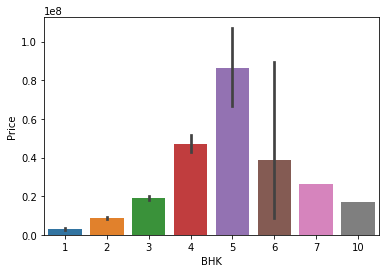

In [72]:
import seaborn as sns
sns.barplot(x='BHK',y='Price',data=df)

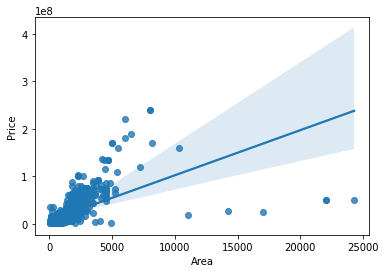

In [73]:
sns.regplot(x='Area',y='Price',data=df)

As the area increases,the price increases

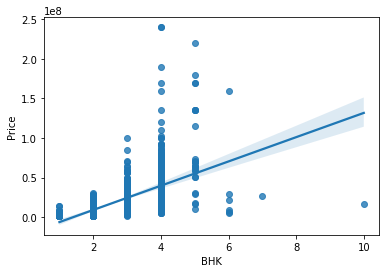

In [74]:
sns.regplot(x='BHK',y='Price',data=df)

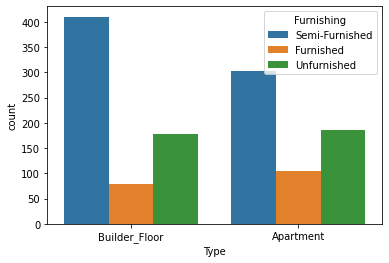

In [75]:
sns.countplot('Type',hue='Furnishing',data=df)

here are more builder floor houses and semi furnished

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Locality']=le.fit_transform(df['Locality'])
df['Furnishing']=le.fit_transform(df['Furnishing'])
df['Transaction']=le.fit_transform(df['Transaction'])
df['Type']=le.fit_transform(df['Type'])
df['Status']=le.fit_transform(df['Status'])

In [77]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,283,1.0,6500000,1,0,1,15690.136542
1,750.0,2,2.0,1,139,1.0,5000000,1,0,0,6667.000000
2,950.0,2,2.0,0,49,1.0,15500000,1,1,0,6667.000000
3,600.0,2,2.0,1,281,1.0,4200000,1,1,1,6667.000000
4,650.0,2,2.0,1,282,1.0,6200000,1,0,1,6667.000000
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,44,3.0,55000000,1,0,1,12916.000000
1255,1050.0,3,2.0,1,44,3.0,12500000,1,1,1,12916.000000
1256,875.0,3,3.0,1,44,3.0,17500000,1,0,1,12916.000000
1257,990.0,2,2.0,2,45,1.0,11500000,1,1,1,12916.000000


In [78]:
X=df.drop(['Price'],axis=1).values
y=df['Price'].values

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_new=sc.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=1)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import ExtraTreesRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rr=RandomForestRegressor(random_state=42)
dt=DecisionTreeRegressor()
rd=Ridge()
ll=Lasso()
lin=LinearRegression()
et=ExtraTreesRegressor()
ad=AdaBoostRegressor()
lst=[rr,dt,rd,ll,lin,et,ad]
for i in lst:
  i.fit(X_train,y_train)
  y_pred1=i.predict(X_test)
  print('**************')
  print(i)
  print('**************')
  print('r2_score:',r2_score(y_test,y_pred1))
  print('mean absolute error:',mean_absolute_error(y_test,y_pred1))
  print('mean squared error:',mean_squared_error(y_test,y_pred1))

**************
RandomForestRegressor(random_state=42)
**************
r2_score: 0.8579851186644165
mean absolute error: 5531709.5290585365
mean squared error: 112142480465934.94
**************
DecisionTreeRegressor()
**************
r2_score: 0.6910511840957616
mean absolute error: 7159576.719576719
mean squared error: 243962366666666.66
**************
Ridge()
**************
r2_score: 0.6099921243026172
mean absolute error: 10351762.531553298
mean squared error: 307970898335679.2
**************
Lasso()
**************
r2_score: 0.6099036950136383
mean absolute error: 10353079.184126895
mean squared error: 308040726791110.6
**************
LinearRegression()
**************
r2_score: 0.6099036433977092
mean absolute error: 10353079.899435623
mean squared error: 308040767549785.1
**************
ExtraTreesRegressor()
**************
r2_score: 0.8521675292790246
mean absolute error: 5162955.291005291
mean squared error: 116736357515119.05
**************
AdaBoostRegressor()
**************
r2_scor

feature selection

In [82]:
df.corr()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
Area,1.000000,0.449438,0.534964,-0.003411,0.024540,-0.008595,0.580836,-0.157769,-0.116283,0.092115,0.160678
BHK,0.449438,1.000000,0.772506,-0.115782,0.066992,-0.068635,0.571523,-0.120472,-0.137574,0.110784,0.165145
Bathroom,0.534964,0.772506,1.000000,-0.027218,0.023704,-0.030513,0.728148,-0.142970,-0.197450,0.136374,0.206659
Furnishing,-0.003411,-0.115782,-0.027218,1.000000,-0.020929,0.072196,0.018491,-0.058870,-0.039871,0.006885,-0.005108
Locality,0.024540,0.066992,0.023704,-0.020929,1.000000,0.009340,0.045160,-0.090484,-0.039240,0.063297,-0.003392
Parking,-0.008595,-0.068635,-0.030513,0.072196,0.009340,1.000000,0.000143,0.016427,0.033411,-0.073647,0.000617
Price,0.580836,0.571523,0.728148,0.018491,0.045160,0.000143,1.000000,-0.186129,-0.218234,0.111642,0.313061
Status,-0.157769,-0.120472,-0.142970,-0.058870,-0.090484,0.016427,-0.186129,1.000000,0.259478,0.031425,-0.020576
Transaction,-0.116283,-0.137574,-0.197450,-0.039871,-0.039240,0.033411,-0.218234,0.259478,1.000000,-0.226707,-0.028879
Type,0.092115,0.110784,0.136374,0.006885,0.063297,-0.073647,0.111642,0.031425,-0.226707,1.000000,0.079859


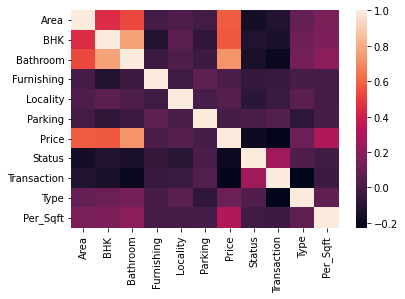

In [83]:
sns.heatmap(df.corr())

In [84]:
df.drop(['Parking','Furnishing'],axis=1,inplace=True)

In [85]:
X=df.drop(['Price'],axis=1).values
y=df['Price'].values

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_new=sc.fit_transform(X)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=1)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import ExtraTreesRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rr=RandomForestRegressor(random_state=42)
dt=DecisionTreeRegressor()
rd=Ridge()
ll=Lasso()
lin=LinearRegression()
et=ExtraTreesRegressor()
ad=AdaBoostRegressor()
lst=[rr,dt,rd,ll,lin,et,ad]
for i in lst:
  i.fit(X_train,y_train)
  y_pred1=i.predict(X_test)
  print('**************')
  print(i)
  print('**************')
  print('r2_score:',r2_score(y_test,y_pred1))
  print('mean absolute error:',mean_absolute_error(y_test,y_pred1))
  print('mean squared error:',mean_squared_error(y_test,y_pred1))


**************
RandomForestRegressor(random_state=42)
**************
r2_score: 0.8584339524647058
mean absolute error: 5556171.367682876
mean squared error: 111788057498369.66
**************
DecisionTreeRegressor()
**************
r2_score: 0.7033598562166093
mean absolute error: 6735211.64021164
mean squared error: 234242786507936.5
**************
Ridge()
**************
r2_score: 0.6224960137686382
mean absolute error: 10093794.69990363
mean squared error: 298097164210042.0
**************
Lasso()
**************
r2_score: 0.622551351611015
mean absolute error: 10093891.699622883
mean squared error: 298053466515480.6
**************
LinearRegression()
**************
r2_score: 0.6225513622657832
mean absolute error: 10093891.676032849
mean squared error: 298053458101910.75
**************
ExtraTreesRegressor()
**************
r2_score: 0.8631385278395871
mean absolute error: 5093136.64021164
mean squared error: 108073075328075.39
**************
AdaBoostRegressor()
**************
r2_score: 0.

hyperparameter tuning  decision tree regressor

In [89]:
from sklearn.model_selection import GridSearchCV
clf1=DecisionTreeRegressor()
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random']}
cls=GridSearchCV(clf1,params,cv=10,scoring='r2')
cls.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [90]:
print(cls.best_params_)

{'criterion': 'squared_error', 'splitter': 'best'}


In [91]:
clf2=DecisionTreeRegressor(criterion='squared_error',splitter='best',random_state=1)
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
print(r2_score(y_test,y_pred2))

0.7186208912840758


hyperparameter tuning randomforest regressor

In [92]:
from sklearn.model_selection import GridSearchCV
clf1=RandomForestRegressor()
params={'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300]}
cls=GridSearchCV(clf1,params,cv=15,scoring='r2')
cls.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [93]:
print(cls.best_params_)

{'max_features': 'sqrt', 'n_estimators': 300}


In [96]:
clf3=RandomForestRegressor(n_estimators=300,max_features='sqrt',random_state=42)
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
print(r2_score(y_test,y_pred3))

0.8900959645716726


Got highest r2_score in random forest regressor and using feature selection method  such as 89% 

In [95]:
clf3.predict(sc.transform([[750.0,2,2.0,25,1,0,1,6667.0]]))

array([5160200.])